In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import seaborn as sns

In [7]:
import matplotlib.pyplot as plt

In [8]:
coils_df = pd.read_excel("dummy data (1).xlsx")

In [12]:
coils_df

,BATCH ID,NET WT,OUT DIA,WIDTH
0,1,25.13270,1734.45,1293.6
1,2,9.57600,1277.10,1187.5
2,3,4.74050,916.37,1237.5
3,4,23.12401,1810.70,1162.5
4,5,23.65363,1827.80,1162.5
...,...,...,...,...
130,131,24.60017,1848.00,1212.5
131,132,23.19300,1810.70,1200.0
132,133,25.22960,1839.20,1237.5
133,134,22.15800,1752.16,1150.0


In [14]:
coils_df['DbyW'] = coils_df['OUT DIA'] / coils_df['WIDTH']

In [16]:
coils_df = np.round(coils_df,2)
coils_df.head()

,BATCH ID,NET WT,OUT DIA,WIDTH,DbyW
0,1,25.13,1734.45,1293.6,1.34
1,2,9.58,1277.10,1187.5,1.08
2,3,4.74,916.37,1237.5,0.74
3,4,23.12,1810.70,1162.5,1.56
4,5,23.65,1827.80,1162.5,1.57


In [18]:
coils_df.rename(columns={
    "BATCH ID": "Coil_ID",
    "NET WT": "Weight_MT",
    "WIDTH": "Width_mm",
    "OUT DIA": "Diameter_mm"
}, inplace=True)

coils_df = coils_df[["Coil_ID", "Weight_MT", "Width_mm", "Diameter_mm", "DbyW"]]
coils_df.head()

,Coil_ID,Weight_MT,Width_mm,Diameter_mm,DbyW
0,1,25.13,1293.6,1734.45,1.34
1,2,9.58,1187.5,1277.10,1.08
2,3,4.74,1237.5,916.37,0.74
3,4,23.12,1162.5,1810.70,1.56
4,5,23.65,1162.5,1827.80,1.57


In [20]:
wagons_df = pd.read_excel('Wagon_Limits_59.xlsx')

In [22]:
wagons_df

,Wagon_ID,Type,W1_Limit,W2_Limit,W3_Limit
0,W01,BRN,35,35,21
1,W02,NBOX,35,35,21
2,W03,BOXN,35,35,21
3,W04,BRN,35,35,21
4,W05,NBOX,35,35,21
5,W06,BOXN,35,35,21
6,W07,BRN,35,35,21
7,W08,NBOX,35,35,21
8,W09,BOXN,35,35,21
9,W10,BRN,35,35,21


In [24]:
wagons = []
for i, row in wagons_df.iterrows():
    wagons.append({
        'Wagon_ID': row['Wagon_ID'],
        'Type': row['Type'],
        'W1_Limit': row['W1_Limit'],
        'W2_Limit': row['W2_Limit'],
        'W3_Limit': row['W3_Limit'],
        'W1_Load': 0.0,
        'W2_Load': 0.0,
        'W3_Load': 0.0,
        'W1_Coils': [],
        'W2_Coils': [],
        'W3_Coils': [],
    })

assignments = []

for i, coil in coils_df.iterrows():
    assigned = False
    for wagon in wagons:
        if len(wagon['W1_Coils']) < 6 and wagon['W1_Load'] + coil['Weight_MT'] <= wagon['W1_Limit']:
            valid = True
            widths = [c['Width_mm'] for c in wagon['W1_Coils']]
            weights = [c['Weight_MT'] for c in wagon['W1_Coils']]
            if any(abs(coil['Width_mm'] - w) > 300 for w in widths):
                valid = False
            if any(max(coil['Weight_MT'], w) > 2.25 * min(coil['Weight_MT'], w) for w in weights):
                valid = False
            if valid:
                wagon['W1_Coils'].append(coil)
                wagon['W1_Load'] += coil['Weight_MT']
                assignments.append({'Coil_ID': coil['Coil_ID'], 'Wagon_ID': wagon['Wagon_ID'], 'Zone': 'W1'})
                assigned = True
                break

        if not assigned and len(wagon['W2_Coils']) < 6 and wagon['W2_Load'] + coil['Weight_MT'] <= wagon['W2_Limit']:
            valid = True
            widths = [c['Width_mm'] for c in wagon['W2_Coils']]
            weights = [c['Weight_MT'] for c in wagon['W2_Coils']]
            if any(abs(coil['Width_mm'] - w) > 300 for w in widths):
                valid = False
            if any(max(coil['Weight_MT'], w) > 2.25 * min(coil['Weight_MT'], w) for w in weights):
                valid = False
            if valid:
                wagon['W2_Coils'].append(coil)
                wagon['W2_Load'] += coil['Weight_MT']
                assignments.append({'Coil_ID': coil['Coil_ID'], 'Wagon_ID': wagon['Wagon_ID'], 'Zone': 'W2'})
                assigned = True
                break

        if not assigned:
                if wagon['W3_Load'] == 0 and coil['Weight_MT'] <= 21:
                    if coil['Weight_MT'] <= wagon['W3_Limit']:
                        if wagon['W1_Load'] >= coil['Weight_MT'] and wagon['W2_Load'] >= coil['Weight_MT']:
                            wagon['W3_Coils'].append(coil)
                            wagon['W3_Load'] += coil['Weight_MT']
                            assignments.append({'Coil_ID': coil['Coil_ID'], 'Wagon_ID': wagon['Wagon_ID'], 'Zone': 'W3'})
                            assigned = True
                            break

assignments_df = pd.DataFrame(assignments)
assignments_df

,Coil_ID,Wagon_ID,Zone
0,1.0,W01,W1
1,2.0,W01,W2
2,3.0,W01,W2
3,4.0,W02,W1
4,5.0,W02,W2
...,...,...,...
130,131.0,W56,W1
131,132.0,W56,W2
132,133.0,W57,W1
133,134.0,W57,W2


In [26]:
def needs_v_groove(row):
    return 'Yes' if row['DbyW'] > 1.5 and 600 < row['Width_mm'] < 1200 else 'No'

assignments_df['V_Groove'] = coils_df.apply(needs_v_groove, axis=1)


In [28]:
assignments_df['Coil_ID'] = np.round(assignments_df['Coil_ID'],0).astype(int)

In [30]:
assignments_df['Coil_ID'] = assignments_df['Coil_ID'].apply(lambda x : "C_" + str(x))

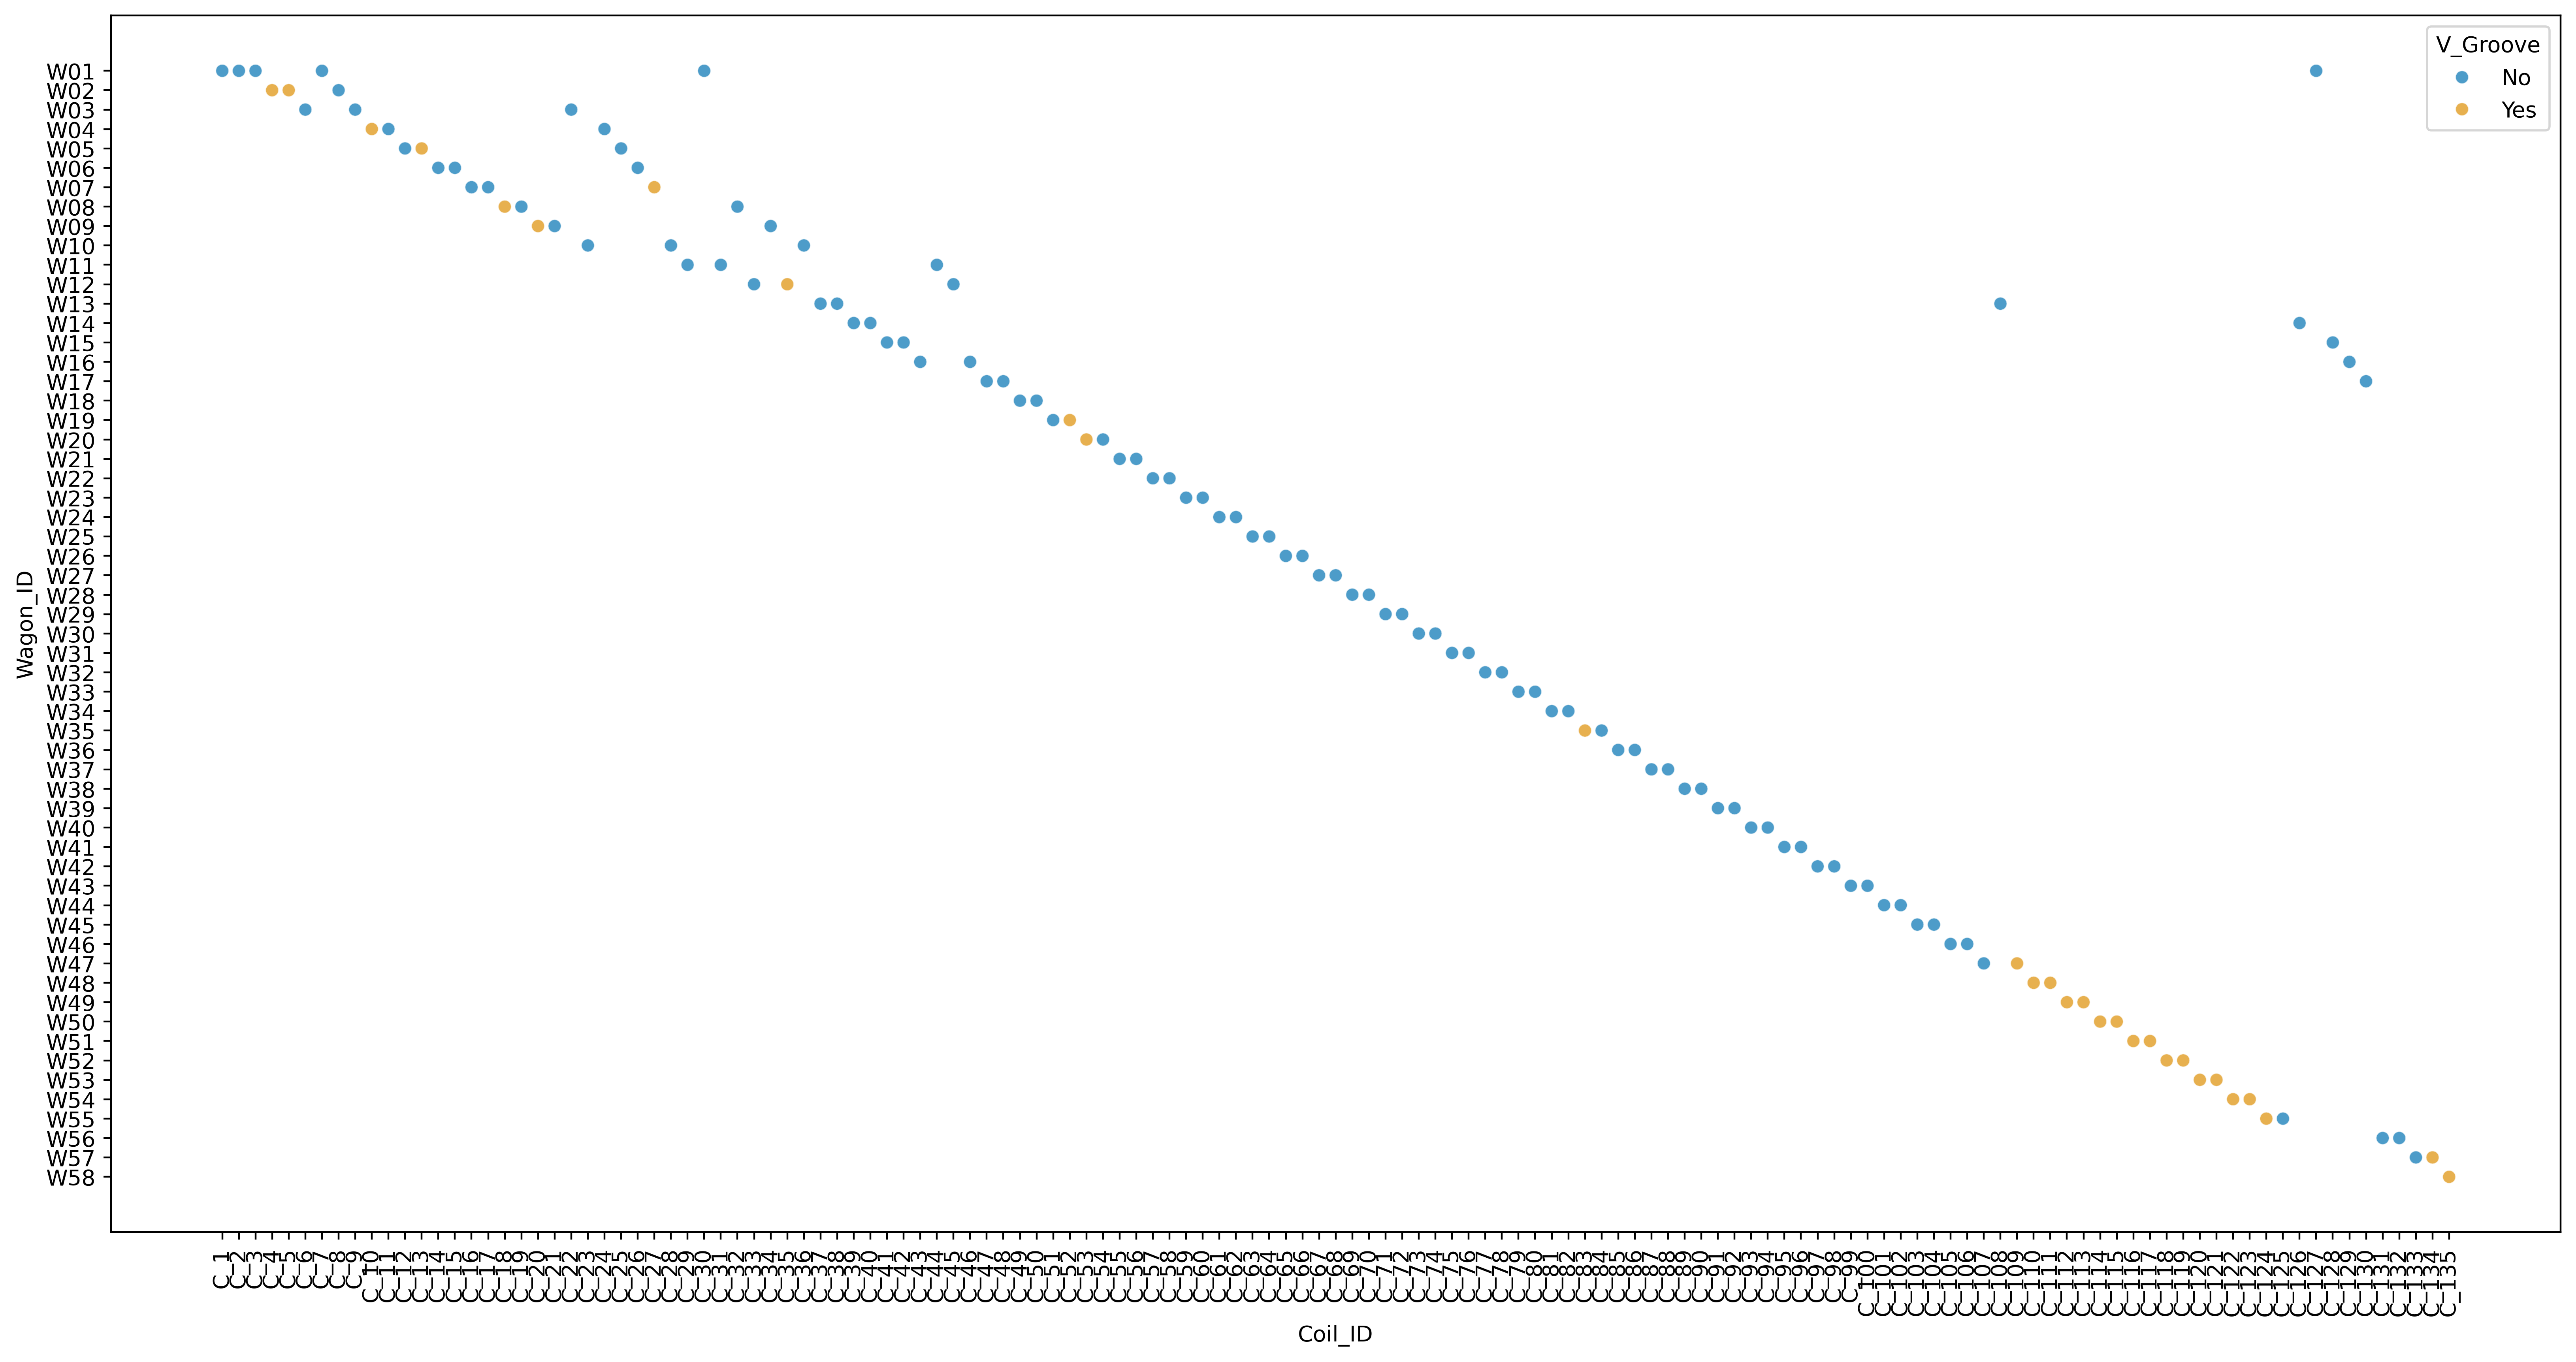

In [237]:
fig = plt.figure(figsize=(20,10), dpi=400)
sns.scatterplot(x='Coil_ID', y="Wagon_ID", data= assignments_df, hue='V_Groove', alpha=0.7, palette='colorblind')
plt.xticks(rotation = 90);

In [33]:
assignments_df.head()

,Coil_ID,Wagon_ID,Zone,V_Groove
0,C_1,W01,W1,No
1,C_2,W01,W2,No
2,C_3,W01,W2,No
3,C_4,W02,W1,Yes
4,C_5,W02,W2,Yes


In [34]:
coils_df['Coil_ID'] = coils_df['Coil_ID'].apply(lambda x : "C_" + str(x))

In [35]:
coils_df.head()

,Coil_ID,Weight_MT,Width_mm,Diameter_mm,DbyW
0,C_1,25.13,1293.6,1734.45,1.34
1,C_2,9.58,1187.5,1277.10,1.08
2,C_3,4.74,1237.5,916.37,0.74
3,C_4,23.12,1162.5,1810.70,1.56
4,C_5,23.65,1162.5,1827.80,1.57


In [36]:
df = pd.merge(left=coils_df, right=assignments_df, how='inner')

In [42]:
df

,Coil_ID,Weight_MT,Width_mm,Diameter_mm,DbyW,Wagon_ID,Zone,V_Groove
0,C_1,25.13,1293.6,1734.45,1.34,W01,W1,No
1,C_2,9.58,1187.5,1277.10,1.08,W01,W2,No
2,C_3,4.74,1237.5,916.37,0.74,W01,W2,No
3,C_4,23.12,1162.5,1810.70,1.56,W02,W1,Yes
4,C_5,23.65,1162.5,1827.80,1.57,W02,W2,Yes
...,...,...,...,...,...,...,...,...
130,C_131,24.60,1212.5,1848.00,1.52,W56,W1,No
131,C_132,23.19,1200.0,1810.70,1.51,W56,W2,No
132,C_133,25.23,1237.5,1839.20,1.49,W57,W1,No
133,C_134,22.16,1150.0,1752.16,1.52,W57,W2,Yes


In [44]:
final = df[['Wagon_ID', 'Zone', 'Coil_ID', 'Weight_MT', 'Width_mm', 'Diameter_mm', 'DbyW', 'V_Groove']]


In [46]:
final

,Wagon_ID,Zone,Coil_ID,Weight_MT,Width_mm,Diameter_mm,DbyW,V_Groove
0,W01,W1,C_1,25.13,1293.6,1734.45,1.34,No
1,W01,W2,C_2,9.58,1187.5,1277.10,1.08,No
2,W01,W2,C_3,4.74,1237.5,916.37,0.74,No
3,W02,W1,C_4,23.12,1162.5,1810.70,1.56,Yes
4,W02,W2,C_5,23.65,1162.5,1827.80,1.57,Yes
...,...,...,...,...,...,...,...,...
130,W56,W1,C_131,24.60,1212.5,1848.00,1.52,No
131,W56,W2,C_132,23.19,1200.0,1810.70,1.51,No
132,W57,W1,C_133,25.23,1237.5,1839.20,1.49,No
133,W57,W2,C_134,22.16,1150.0,1752.16,1.52,Yes


In [48]:
final['Zone'].value_counts()

Zone
W2    60
W1    58
W3    17
Name: count, dtype: int64

In [50]:
final.columns

Index(['Wagon_ID', 'Zone', 'Coil_ID', 'Weight_MT', 'Width_mm', 'Diameter_mm',
       'DbyW', 'V_Groove'],
      dtype='object')

In [52]:
X = final.drop(['Wagon_ID','Coil_ID','Zone'],axis=1)

In [54]:
X = pd.get_dummies(X, drop_first=True)

In [56]:
X

,Weight_MT,Width_mm,Diameter_mm,DbyW,V_Groove_Yes
0,25.13,1293.6,1734.45,1.34,False
1,9.58,1187.5,1277.10,1.08,False
2,4.74,1237.5,916.37,0.74,False
3,23.12,1162.5,1810.70,1.56,True
4,23.65,1162.5,1827.80,1.57,True
...,...,...,...,...,...
130,24.60,1212.5,1848.00,1.52,False
131,23.19,1200.0,1810.70,1.51,False
132,25.23,1237.5,1839.20,1.49,False
133,22.16,1150.0,1752.16,1.52,True


In [58]:
y = final['Zone']

In [60]:
from sklearn.model_selection import train_test_split

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=21, stratify=y)
from sklearn.ensemble import RandomForestClassifier 

In [197]:
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_resampled, y_resampled)

RandomForestClassifier(class_weight='balanced')

In [199]:
y_pred = model.predict(X_test)

In [201]:
from sklearn.metrics import classification_report

In [203]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          W1       0.76      0.84      0.80        19
          W2       0.79      0.75      0.77        20
          W3       1.00      0.83      0.91         6

    accuracy                           0.80        45
   macro avg       0.85      0.81      0.83        45
weighted avg       0.81      0.80      0.80        45



In [193]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=34)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)


In [205]:
model_final = pd.DataFrame(model.feature_importances_)

In [207]:
model_final.sort_values(by=0)

,0
4,0.005439
1,0.156248
3,0.189708
2,0.245348
0,0.403256


In [209]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [211]:
c = confusion_matrix(y_test,y_pred)

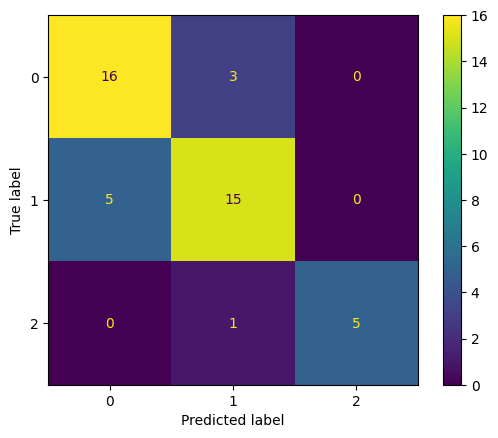

In [213]:
ConfusionMatrixDisplay(c).plot()

In [219]:
new_data = pd.DataFrame([{
    'Weight_MT': 18.5,
    'Width_mm': 1050,
    'Diameter_mm': 1300,
    'DbyW': 1.2,
    'V_Groove_Yes': 1  
}])

In [223]:
zone_pred = model.predict(new_data)
print("Predicted Zone:", zone_pred)

Predicted Zone: ['W3']


In [239]:
final.to_excel("RAKE_PLANNING.xlsx", index=False, engine='openpyxl')
